## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carga de datos
df=pd.read_csv('../data/raw/cancer.csv')
df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
5,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,0
6,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,0
7,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,0
8,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,0
9,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,...,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408,0


Limpieza y modificación del dataset

In [3]:
#Encontrar duplicadas
df.duplicated().sum()

0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              1707 non-null   float64
 1   texture_mean             1707 non-null   float64
 2   perimeter_mean           1707 non-null   float64
 3   area_mean                1707 non-null   float64
 4   smoothness_mean          1707 non-null   float64
 5   compactness_mean         1707 non-null   float64
 6   concavity_mean           1707 non-null   float64
 7   concave points_mean      1707 non-null   float64
 8   symmetry_mean            1707 non-null   float64
 9   fractal_dimension_mean   1707 non-null   float64
 10  radius_se                1707 non-null   float64
 11  texture_se               1707 non-null   float64
 12  perimeter_se             1707 non-null   float64
 13  area_se                  1707 non-null   float64
 14  smoothness_se           

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,...,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,15.685153,21.884470,102.338293,744.269766,0.127187,0.108874,0.120859,0.070527,0.196364,0.046889,...,29.298363,120.208394,1097.084382,0.153036,0.336826,0.391843,0.154030,0.329089,0.078518,0.372583
std,4.141541,4.725375,27.870323,357.352446,0.815260,0.802414,0.809326,0.789224,0.821795,0.839971,...,6.700861,38.984300,702.241081,0.794119,0.822466,0.819804,0.805770,0.811623,0.826379,0.483634
min,6.981000,9.710000,43.790000,143.500000,-3.146299,-2.835169,-3.121895,-3.134458,-3.274858,-3.277862,...,12.020000,50.410000,185.200000,-2.928944,-2.596145,-2.742923,-2.953758,-2.948384,-3.377854,0.000000
25%,12.770000,18.605000,82.776758,512.073910,-0.138822,-0.202028,-0.147444,-0.241727,-0.068324,-0.270379,...,24.723592,92.325085,619.397551,-0.164132,0.058837,0.037684,-0.139854,0.091567,-0.239941,0.000000
50%,14.715360,21.540000,95.248300,646.270887,0.098160,0.094450,0.075564,0.038067,0.180900,0.061330,...,28.940000,107.700908,799.600000,0.134100,0.254800,0.312000,0.108488,0.288400,0.078730,0.000000
75%,18.148302,24.746887,118.559141,880.468052,0.446858,0.425137,0.450434,0.377214,0.540978,0.381090,...,33.518842,144.983648,1493.875857,0.430273,0.739822,0.821486,0.470055,0.619518,0.403826,1.000000
max,31.985974,42.378628,210.419964,2635.306447,3.951918,3.142277,3.220939,3.742178,3.598207,3.286311,...,56.203999,281.471268,4850.529508,3.242244,3.022246,3.639660,2.818785,3.633160,3.012396,1.000000


Text(0.5, 1.0, 'Frecuencia clases diagnosis')

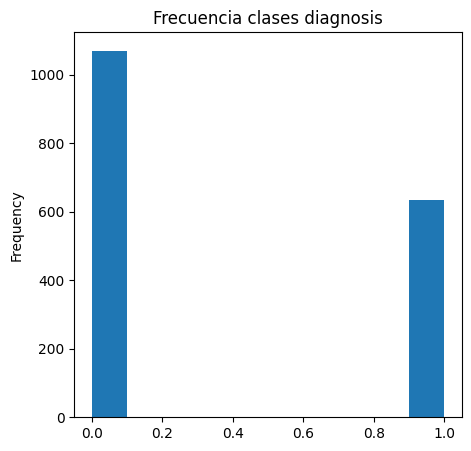

In [35]:
#Grafica frecuencias clases diagnosis (benigno=0,maligno=1)
plt.figure(figsize = (5,5))
df['diagnosis'].plot(kind='hist')
plt.title('Frecuencia clases diagnosis')

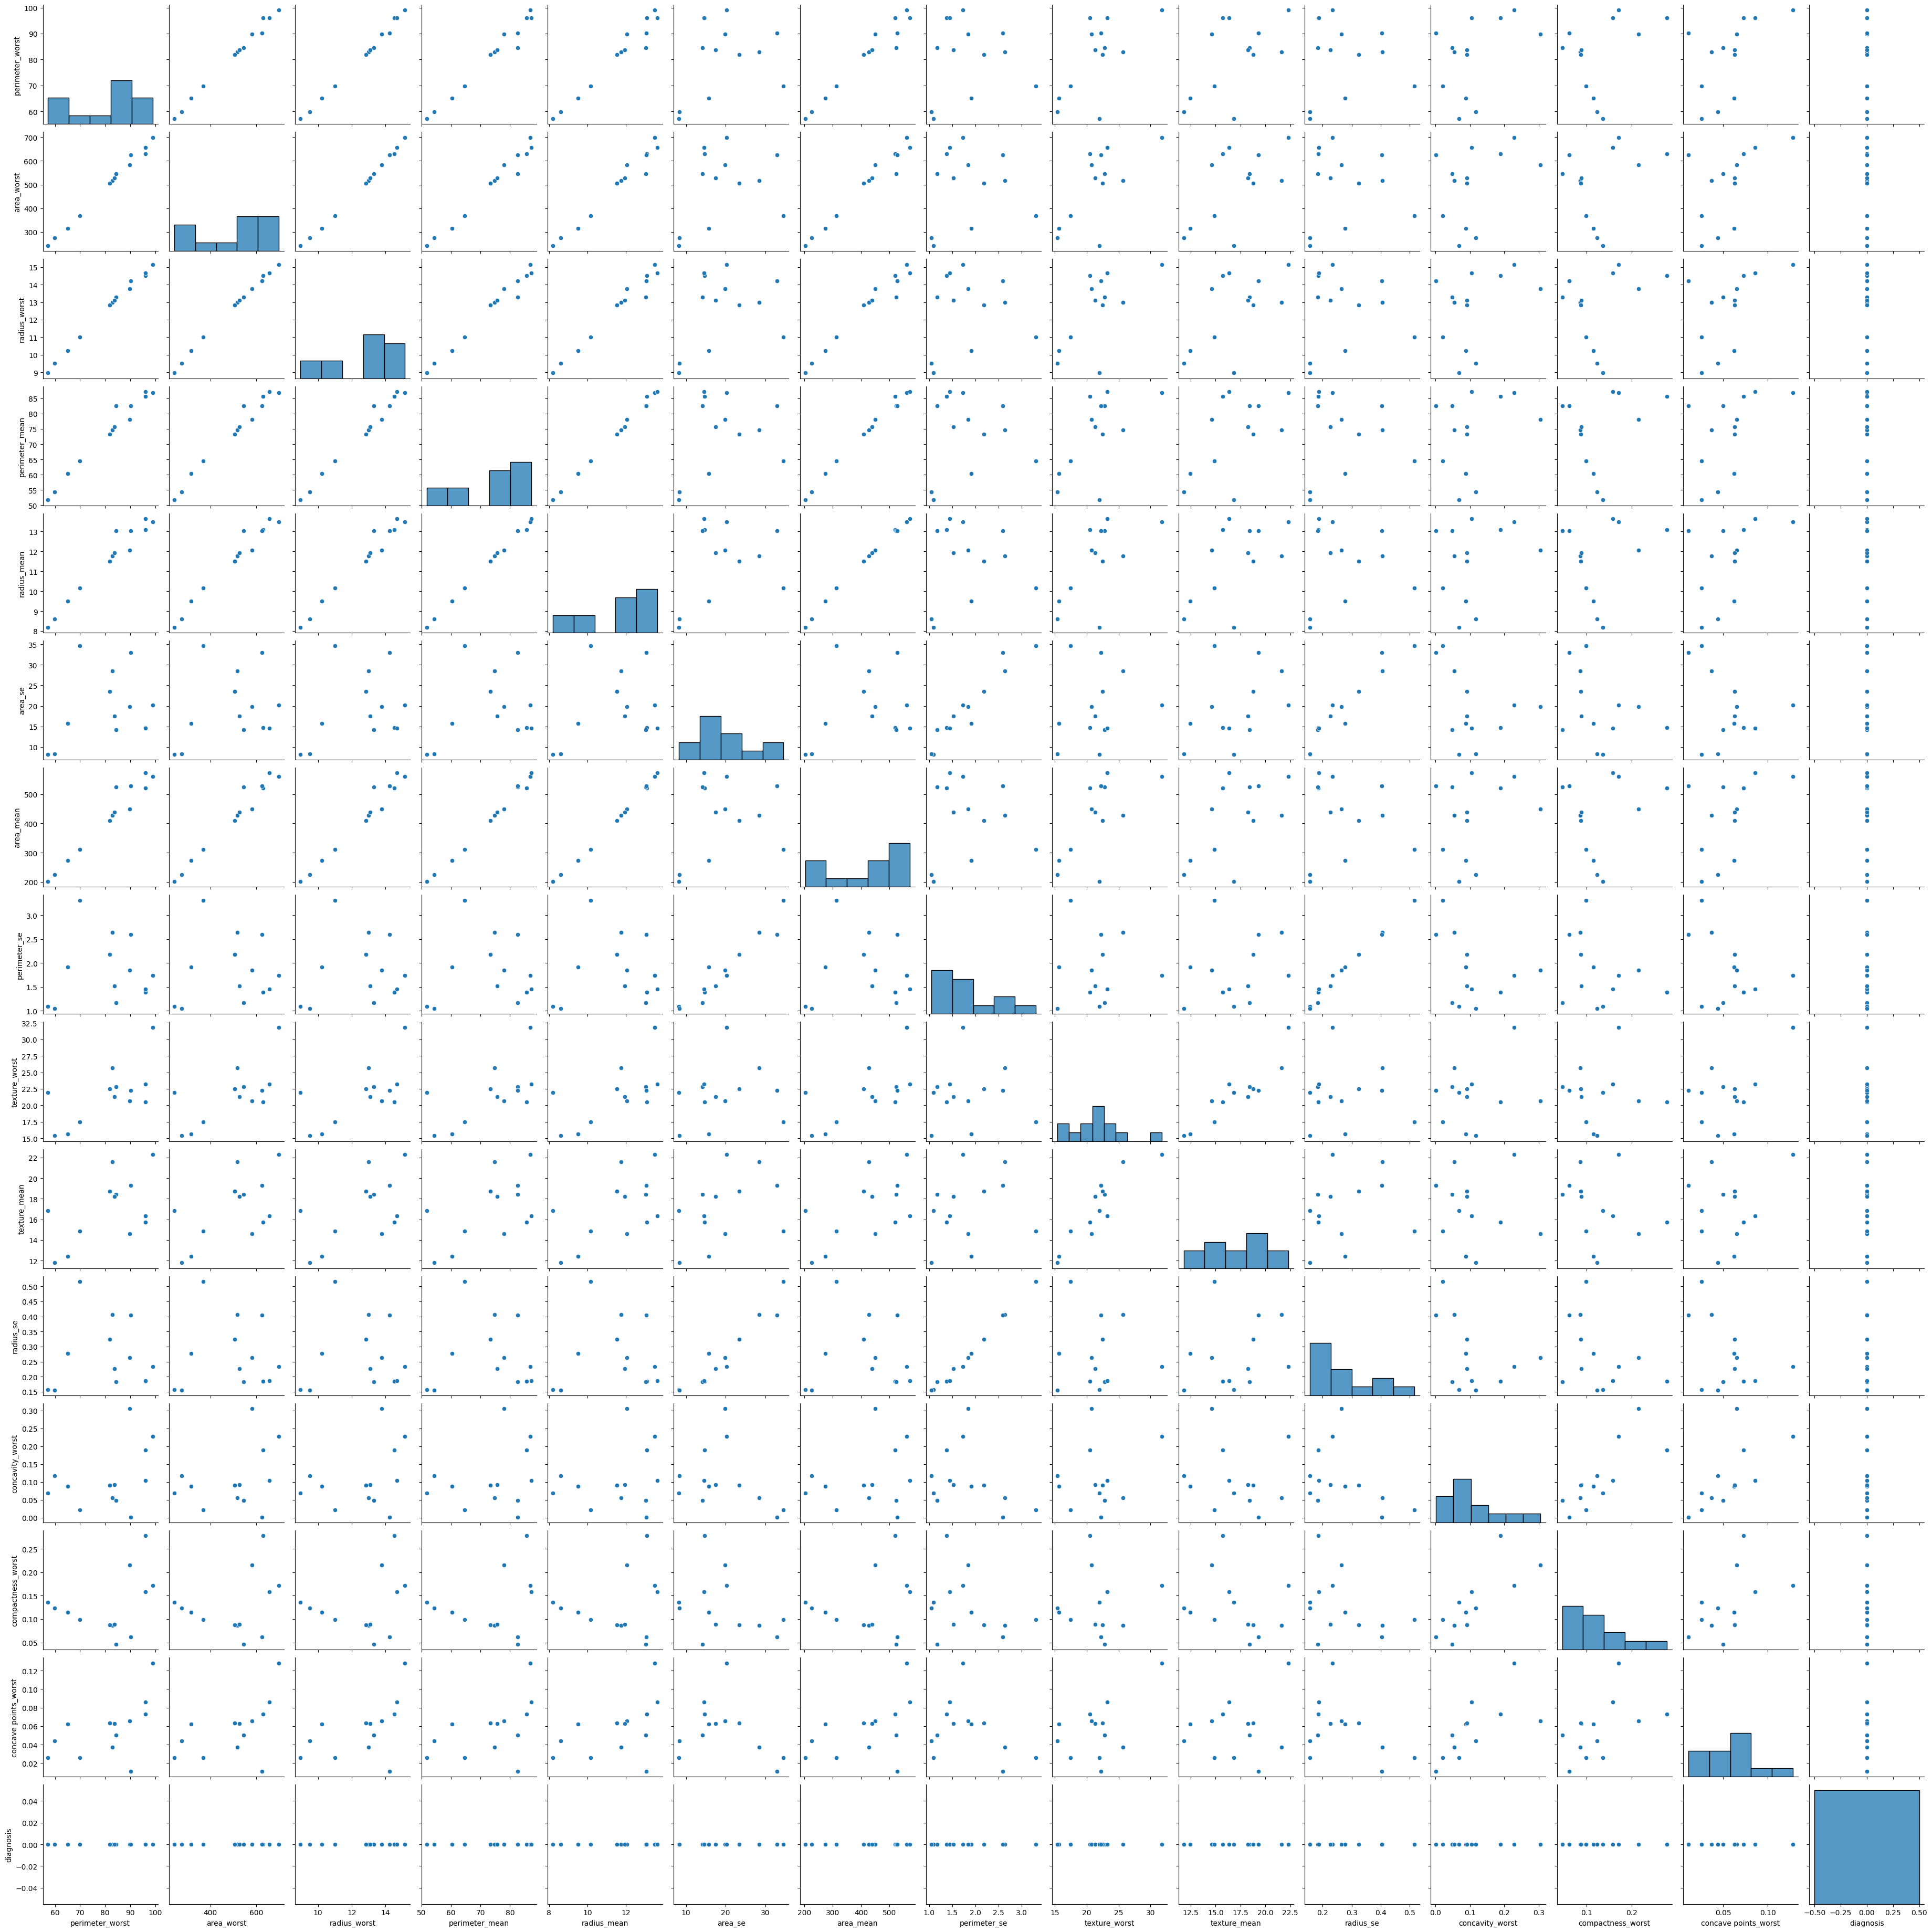

In [31]:
sns.pairplot(df[1:14])

In [4]:
correlaciones = df.corr()

<Axes: >

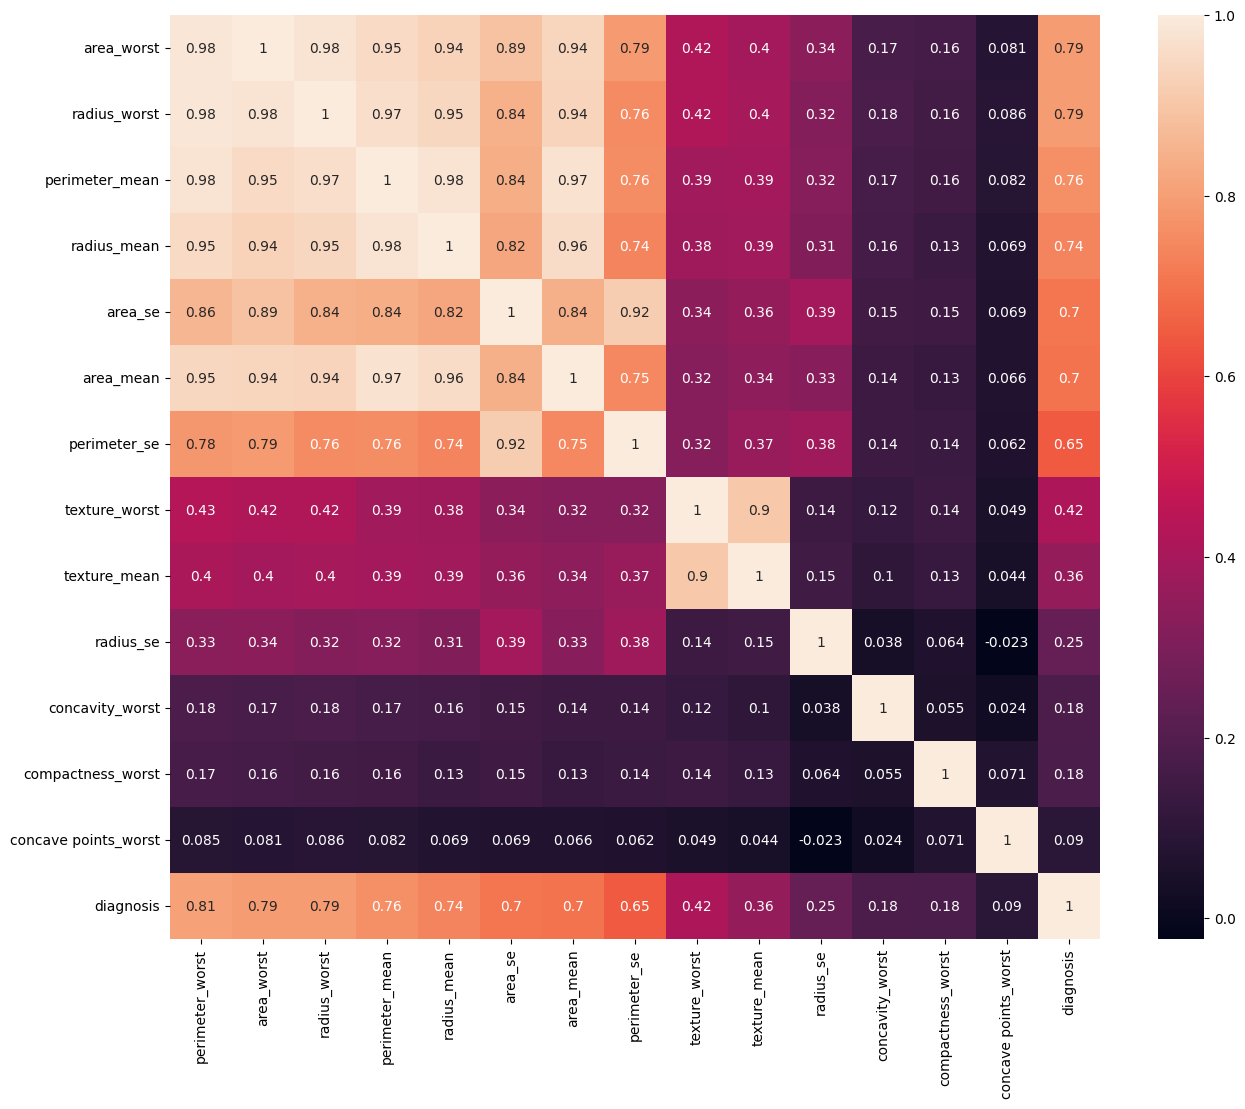

In [34]:
#heatmap correlaciones
plt.figure(figsize = (15,12))
sns.heatmap(df.corr()[1:15], annot=True)

In [5]:
correlaciones['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
perimeter_worst            0.805377
area_worst                 0.793500
radius_worst               0.792879
perimeter_mean             0.762673
radius_mean                0.737064
area_se                    0.704810
area_mean                  0.697811
perimeter_se               0.647260
texture_worst              0.416090
texture_mean               0.357363
radius_se                  0.248228
concavity_worst            0.183100
compactness_worst          0.180285
concave points_worst       0.090422
concavity_mean             0.086818
symmetry_worst             0.062696
compactness_mean           0.035730
smoothness_worst           0.019334
concavity_se               0.014681
fractal_dimension_mean     0.014420
compactness_se             0.013959
symmetry_mean              0.011274
smoothness_mean            0.010069
concave points_mean        0.009626
symmetry_se                0.006526
concave points_se          0.006145
fractal_dimension_se       0

In [7]:
columnas=['perimeter_worst','area_worst','radius_worst',
'perimeter_mean','radius_mean','area_se','area_mean','perimeter_se','texture_worst','texture_mean','radius_se','concavity_worst',
'compactness_worst','concave points_worst','diagnosis']
df_limpio = df[columnas]

Guardamos datos limpios

In [8]:
df_limpio.to_csv('../data/processed/cancer_limpio.csv',index=False)